In [7]:
!ls

'Imaging Test.ipynb'   margin_rodent.jpg   Sub_images	     tumours
 LICENSE	       README.md	   tumor_human.jpg


In [8]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import argparse


In [9]:
#read images
negative = cv2.imread("margin_rodent.jpg")
positive = cv2.imread("tumor_human.jpg")

First display images

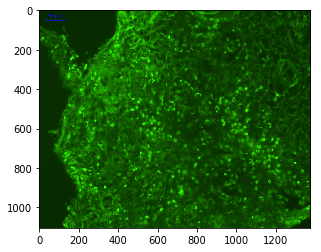

In [10]:
plt.imshow(positive)

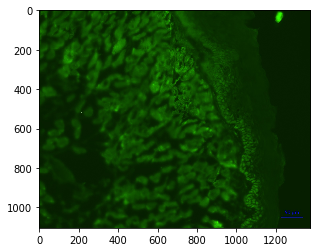

In [11]:
plt.imshow(negative)

Convert images to grayscale for manipulation

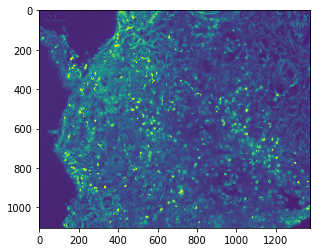

In [12]:
gray_pos = cv2.cvtColor(positive, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_pos)

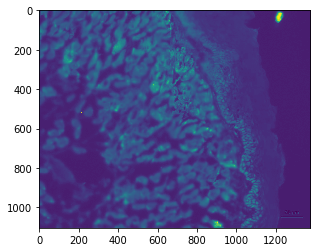

In [13]:
gray_neg = cv2.cvtColor(negative, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_neg)

# Image Thresholding as an initial trial

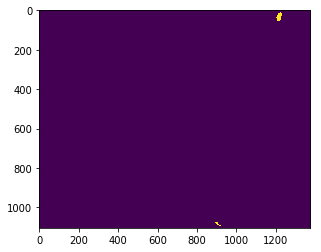

In [14]:
blurred_neg = cv2.bilateralFilter(gray_neg,9,75,75)
#blurred_neg = cv2.Laplacian(gray_neg,cv2.CV_64F)
thresh = cv2.threshold(blurred_neg, 120, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)

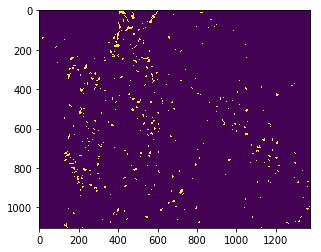

In [15]:
#blurred_pos = cv2.GaussianBlur(gray_pos, (5, 5), 0)
thresh = cv2.threshold(gray_pos, 120, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)

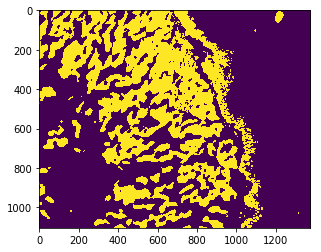

In [24]:
_, th2 = cv2.threshold(gray_neg,200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th2)

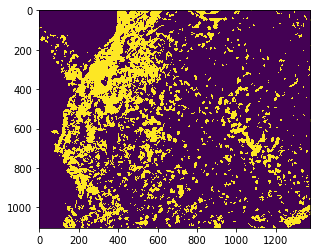

In [25]:
_, th3 = cv2.threshold(gray_pos,200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(th3)